In [35]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 


In [36]:
file_userdata = 'user_data.csv'
df_user = pd.read_csv(file_userdata)
df_user.info()
df_user.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_id              80 non-null     int64  
 1   Ages                 80 non-null     int64  
 2   Gender               80 non-null     object 
 3   Height               80 non-null     float64
 4   Weight               80 non-null     float64
 5   Bmi                  80 non-null     float64
 6   Disease_Type         80 non-null     object 
 7   Activity_Level       80 non-null     object 
 8   Daily_Calorie        80 non-null     int64  
 9   Food_Recommendation  80 non-null     object 
dtypes: float64(3), int64(3), object(4)
memory usage: 6.4+ KB


User_id  Ages Gender  Height  Weight   Bmi        Disease_Type  \
0         1    62    ‡∏ä‡∏≤‡∏¢   170.0    85.0  29.4          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
1         2    68   ‡∏´‡∏ç‡∏¥‡∏á   155.0    60.0  25.0  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
2         3    61    ‡∏ä‡∏≤‡∏¢   164.0    58.1  21.6               ‡πÑ‡∏°‡πà‡∏°‡∏µ   
3         4    75    ‡∏ä‡∏≤‡∏¢   152.0    86.8  37.6  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
4         5    70    ‡∏ä‡∏≤‡∏¢   165.0    52.0  19.1            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
5         6    68   ‡∏´‡∏ç‡∏¥‡∏á   170.0    65.0  22.5            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
6         7    65   ‡∏´‡∏ç‡∏¥‡∏á   155.0    47.9  19.9               ‡πÑ‡∏°‡πà‡∏°‡∏µ   
7         8    72   ‡∏´‡∏ç‡∏¥‡∏á   154.1    83.0  35.0  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
8         9    69    ‡∏ä‡∏≤‡∏¢   151.0    50.2  22.0            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
9        10    74   ‡∏´‡∏ç‡∏¥‡∏á   171.0    69.4  23.7  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
10       11    66   ‡∏´‡∏ç‡∏¥‡∏á   168.0    56.2  19.9          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
11       12    61    ‡∏ä‡∏≤‡∏¢   159.0    52.6  20.8               ‡πÑ‡∏°‡πà‡∏°‡∏µ   
12       13    76   ‡∏´‡∏ç‡∏¥‡∏á   161.0    83.6  32.3  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
13       14    60    ‡∏ä‡∏≤‡∏¢   171.0    90.7  31.0          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
14       15    45    ‡∏ä‡∏≤‡∏¢   150.0    69.0  30.7  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
15       16    77    ‡∏ä‡∏≤‡∏¢   166.0    77.9  28.3  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
16       17    79   ‡∏´‡∏ç‡∏¥‡∏á   158.0    86.6  34.7            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
17       18    79    ‡∏ä‡∏≤‡∏¢   155.0    57.0  23.7            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
18       19    64    ‡∏ä‡∏≤‡∏¢   174.0    51.2  16.9               ‡πÑ‡∏°‡πà‡∏°‡∏µ   
19       20    79   ‡∏´‡∏ç‡∏¥‡∏á   150.0    82.7  36.8          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
20       21    68   ‡∏´‡∏ç‡∏¥‡∏á   167.0    62.0  22.2               ‡πÑ‡∏°‡πà‡∏°‡∏µ   
21       22    61   ‡∏´‡∏ç‡∏¥‡∏á   170.0    63.8  22.1          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
22       23    72   ‡∏´‡∏ç‡∏¥‡∏á   154.0    59.2  25.0  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
23       24    69    ‡∏ä‡∏≤‡∏¢   151.0    43.0  18.9               ‡πÑ‡∏°‡πà‡∏°‡∏µ   
24       25    64    ‡∏ä‡∏≤‡∏¢   175.0    58.4  19.1            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
25       26    72    ‡∏ä‡∏≤‡∏¢   142.0    65.2  32.3          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
26       27    61    ‡∏ä‡∏≤‡∏¢   164.0    48.6  18.1            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
27       28    76   ‡∏´‡∏ç‡∏¥‡∏á   150.0    63.0  28.0          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
28       29    77    ‡∏ä‡∏≤‡∏¢   153.0    53.3  22.8  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
29       30    68   ‡∏´‡∏ç‡∏¥‡∏á   177.0    50.4  16.1               ‡πÑ‡∏°‡πà‡∏°‡∏µ   
30       31    65    ‡∏ä‡∏≤‡∏¢   150.0    42.3  18.8               ‡πÑ‡∏°‡πà‡∏°‡∏µ   
31       32    73    ‡∏ä‡∏≤‡∏¢   158.0    90.0  36.1          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
32       33    64    ‡∏ä‡∏≤‡∏¢   184.0    51.3  15.2          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
33       34    71   ‡∏´‡∏ç‡∏¥‡∏á   165.0    55.0  20.2            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
34       35    60   ‡∏´‡∏ç‡∏¥‡∏á   152.0    54.1  23.4  ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á   
35       36    61    ‡∏ä‡∏≤‡∏¢   177.0    58.4  18.6               ‡πÑ‡∏°‡πà‡∏°‡∏µ   
36       37    79   ‡∏´‡∏ç‡∏¥‡∏á   163.0    49.8  18.7            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
37       38    62   ‡∏´‡∏ç‡∏¥‡∏á   160.0    70.2  27.4            ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à   
38       39    69   ‡∏´‡∏ç‡∏¥‡∏á   163.0    72.5  27.3          ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô   
39       40    64   ‡∏´‡∏ç‡∏¥‡∏á   167.0    63.2  22.7               ‡πÑ‡∏°‡πà‡∏°‡∏µ   

   Activity_Level  Daily_Calorie 

In [37]:
file_fooddata = 'food_data.csv'
df_food = pd.read_csv(file_fooddata)
df_food.info()
df_food.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Food_id                   150 non-null    int64  
 1   Food_Name                 150 non-null    object 
 2   ‡∏õ‡∏£‡∏¥‡∏°‡∏≤‡∏ì                    150 non-null    object 
 3   Category                  150 non-null    object 
 4   Energy (kcal)             150 non-null    int64  
 5   Protein (g)               150 non-null    float64
 6   Carbohydrates (g)         150 non-null    float64
 7   Sugars (g)                150 non-null    float64
 8   Fat (g)                   150 non-null    float64
 9   Sodium (mg)               150 non-null    float64
 10  Food_Type                 150 non-null    object 
 11  Suitable For Disease      150 non-null    object 
 12  Food Type Not suitable    59 non-null     object 
 13  Not suitable for disease  59 non-null     object 
dty

Food_id                                          Food_Name  \
0         1                                           ‡∏Å‡∏•‡πâ‡∏ß‡∏¢‡πÑ‡∏Ç‡πà   
1         2                                        ‡∏Å‡∏•‡πâ‡∏ß‡∏¢‡∏ô‡πâ‡∏≥‡∏ß‡πâ‡∏≤   
2         3                                          ‡πÅ‡∏Å‡πâ‡∏ß‡∏°‡∏±‡∏á‡∏Å‡∏£   
3         4                                               ‡∏Ç‡∏ô‡∏∏‡∏ô   
4         5                                           ‡πÅ‡∏Ñ‡∏ô‡∏ï‡∏≤‡∏•‡∏π‡∏õ   
5         6                                              ‡∏ù‡∏£‡∏±‡πà‡∏á   
6         7                                               ‡πÄ‡∏á‡∏≤‡∏∞   
7         8                                              ‡∏ä‡∏°‡∏û‡∏π‡πà   
8         9                                              ‡πÅ‡∏ï‡∏á‡πÇ‡∏°   
9        10                                            ‡∏ó‡∏∏‡πÄ‡∏£‡∏µ‡∏¢‡∏ô   
10       11                                           ‡∏ô‡πâ‡∏≠‡∏¢‡∏´‡∏ô‡πà‡∏≤   
11       12                                             ‡∏°‡∏±‡∏á‡∏Ñ‡∏∏‡∏î   
12       13                                                ‡∏™‡πâ‡∏°   
13       14                                           ‡πÅ‡∏≠‡∏õ‡πÄ‡∏õ‡∏¥‡πâ‡∏•   
14       15                                              ‡∏≠‡∏á‡∏∏‡πà‡∏ô   
15       16                                         ‡∏™‡∏ï‡∏£‡∏≠‡πÄ‡∏ö‡∏≠‡∏£‡∏µ‡πà   
16       17                                            ‡∏Å‡∏µ‡∏ß‡∏µ ‡∏ú‡∏•   
17       18                                         ‡πÄ‡∏ä‡∏≠‡∏£‡∏µ‡πà ‡πÑ‡∏ó‡∏¢   
18       19                                              ‡∏™‡πâ‡∏°‡πÇ‡∏≠   
19       20                                       ‡∏™‡πâ‡∏°‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß‡∏´‡∏ß‡∏≤‡∏ô   
20       21                                              ‡∏™‡∏≤‡∏•‡∏µ‡πà   
21       22                                            ‡∏™‡∏±‡∏ö‡∏õ‡∏∞‡∏£‡∏î   
22       23                                             ‡πÅ‡∏ï‡∏á‡πÑ‡∏ó‡∏¢   
23       24                                           ‡∏û‡∏∏‡∏ó‡∏£‡∏≤‡πÑ‡∏ó‡∏¢   
24       25                                          ‡∏≠‡∏∞‡πÇ‡∏ß‡∏Ñ‡∏≤‡πÇ‡∏î‡πâ   
25       26                                             ‡∏Å‡∏≤‡πÅ‡∏ü‡∏î‡∏≥   
26       27                                         ‡∏ô‡πâ‡∏≥‡πÄ‡∏Å‡πá‡∏Å‡∏Æ‡∏ß‡∏¢   
27       28                                           ‡∏ô‡πâ‡∏≥‡∏°‡∏∞‡∏ô‡∏≤‡∏ß   
28       29                                          ‡∏ô‡πâ‡∏≥‡πÄ‡∏™‡∏≤‡∏ß‡∏£‡∏™   
29       30                                           ‡∏ô‡πâ‡∏≥‡∏≠‡∏á‡∏∏‡πà‡∏ô   
30       31                                             ‡∏ô‡πâ‡∏≥‡∏™‡πâ‡∏°   
31       32                                         ‡∏ô‡πâ‡∏≥‡∏°‡∏∞‡∏û‡∏£‡πâ‡∏≤‡∏ß   
32       33                                       ‡∏ô‡πâ‡∏≥‡∏°‡∏∞‡πÄ‡∏Ç‡∏∑‡∏≠‡πÄ‡∏ó‡∏®   
33       34  ‡∏ô‡πâ‡∏≥‡∏ô‡∏°‡∏ñ‡∏±‡πà‡∏ß‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡∏á ‡πÅ‡∏•‡∏Ñ‡∏ï‡∏≤‡∏ã‡∏≠‡∏¢ ‡∏™‡∏π‡∏ï‡∏£‡πÑ‡∏°‡πà‡πÄ‡∏ï‡∏¥‡∏°‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ó‡∏£‡∏≤‡∏¢...   
34       35   ‡∏ô‡πâ‡∏≥‡∏ô‡∏°‡∏ñ‡∏±‡πà‡∏ß‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡∏á ‡πÅ‡∏•‡∏Ñ‡∏ï‡∏≤‡∏ã‡∏≠‡∏¢ ‡∏™‡∏π‡∏ï‡∏£‡πÅ‡∏Ñ‡∏á‡πÄ‡∏ã‡∏µ‡∏¢‡∏°‡∏™‡∏π‡∏á 300 ‡∏°‡∏•.   
35       36           ‡∏ô‡πâ‡∏≥‡∏ô‡∏°‡∏ñ‡∏±‡πà‡∏ß‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡∏á ‡πÅ‡∏•‡∏Ñ‡∏ï‡∏≤‡∏ã‡∏≠‡∏¢ ‡∏£‡∏™‡∏´‡∏ß‡∏≤‡∏ô‡∏≠‡∏≠‡∏£‡∏¥‡∏à‡∏¥‡∏ô‡∏±‡∏•   
36       37                          ‡∏ô‡∏°‡∏ñ‡∏±‡πà‡∏ß‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡∏á‡∏ú‡∏™‡∏°‡∏á‡∏≤‡∏î‡∏≥ ‡∏î‡∏µ‡∏ô‡πà‡∏≤   
37       38                                        ‡πÅ‡∏ã‡∏ô‡∏ß‡∏¥‡∏ä, ‡πÑ‡∏Å‡πà   
38       39                                        ‡πÅ‡∏ã‡∏ô‡∏ß‡∏¥‡∏ä, ‡∏õ‡∏•‡∏≤   
39       40                                             ‡∏Æ‡∏≠‡∏ó‡∏î‡∏≠‡∏Å   

              ‡∏õ‡∏£‡∏¥‡∏°‡∏≤‡∏ì     Category  Energy (kcal)  Protein (g)  \
0              100 g        ‡∏ú‡∏•‡πÑ‡∏°‡πâ            107         1.35   
1              100 g        ‡∏ú‡∏•‡πÑ‡∏°‡πâ            118         0.78   
2              100 g        ‡∏ú‡∏•‡πÑ‡∏°‡πâ             56         1.30   
3              100 g        ‡∏ú‡∏•‡πÑ‡∏°‡πâ            101         1.55   
4              100 g        ‡∏ú‡∏•‡πÑ‡∏°‡πâ             28         0.50   
5              100 g 

In [38]:
print("-----------‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ú‡∏π‡πâ‡πÉ‡∏ä‡πâ-----------")
print(df_user.Gender.unique())
print(df_user.Disease_Type.unique())
print(df_user.Activity_Level.unique())
print(df_user.Food_Recommendation.unique())


print("-----------‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏≤‡∏´‡∏≤‡∏£-----------")
print(df_food.Category.unique())
print(df_food.Food_Type.unique())

-----------‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ú‡∏π‡πâ‡πÉ‡∏ä‡πâ-----------
['‡∏ä‡∏≤‡∏¢' '‡∏´‡∏ç‡∏¥‡∏á']
['‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô' '‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á' '‡πÑ‡∏°‡πà‡∏°‡∏µ' '‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à'
 '‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á' '‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à'
 '‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á,‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à' '‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á,‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à']
['‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á' '‡∏ô‡πâ‡∏≠‡∏¢' '‡∏°‡∏≤‡∏Å']
['‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥' '‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥' '‡∏™‡∏°‡∏î‡∏∏‡∏•' '‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥' '‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥+‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥'
 '‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥+‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥' '‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥+‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥'
 '‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥+‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥+‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥']
-------

In [39]:
df_user['Gender'] = df_user.Gender.replace(['‡∏ä‡∏≤‡∏¢','‡∏´‡∏ç‡∏¥‡∏á'],[1,2])
df_user['Disease_Type'] = df_user.Disease_Type.replace(['‡πÑ‡∏°‡πà‡∏°‡∏µ','‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô','‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á','‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à','‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á','‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à','‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á,‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à','‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á,‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à'],[0,1,2,3,4,5,6,7])
df_user['Activity_Level'] = df_user.Activity_Level.replace(['‡∏ô‡πâ‡∏≠‡∏¢','‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á','‡∏°‡∏≤‡∏Å'],[1,2,3])
df_user['Food_Recommendation'] = df_user.Food_Recommendation.replace(['‡∏™‡∏°‡∏î‡∏∏‡∏•','‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥','‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥','‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥','‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥+‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥','‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥+‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥','‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥+‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥','‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥+‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥+‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥'],[0,1,2,3,4,5,6,7])



# df_food['Category'] = df_food.Category.replace(['‡∏ú‡∏•‡πÑ‡∏°‡πâ', '‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏î‡∏∑‡πà‡∏°' ,'‡∏ü‡∏≤‡∏™‡∏ï‡πå‡∏ü‡∏π‡πâ‡∏î' ,'‡∏Ç‡∏ô‡∏°' ,'‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏à‡∏≤‡∏ô‡∏´‡∏•‡∏±‡∏Å'],[0,1,2,3,4])
df_food['Food_Type'] = df_food.Food_Type.replace(['‡∏™‡∏°‡∏î‡∏∏‡∏•','‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥','‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥','‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥'],[0,1,2,3])

C:\Users\User\AppData\Local\Temp\ipykernel_20472\2539377442.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_user['Gender'] = df_user.Gender.replace(['‡∏ä‡∏≤‡∏¢','‡∏´‡∏ç‡∏¥‡∏á'],[1,2])
C:\Users\User\AppData\Local\Temp\ipykernel_20472\2539377442.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_user['Disease_Type'] = df_user.Disease_Type.replace(['‡πÑ‡∏°‡πà‡∏°‡∏µ','‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô','‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á','‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à','‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

df_user.drop(columns=['Daily_Calorie'])
x = df_user[['Ages', 'Gender', 'Height','Weight','Bmi', 'Disease_Type','Activity_Level']]
y = df_user['Food_Recommendation']

# ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏õ‡πá‡∏ô Train (70%) ‡πÅ‡∏•‡∏∞ Test (30%)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
print('---------train---------')
print(X_train.count())
print('---------test---------')
print(X_test.count())

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÉ‡∏´‡∏°‡πà‡∏î‡πâ‡∏ß‡∏¢‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Train
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÅ‡∏•‡∏∞‡∏ß‡∏±‡∏î Accuracy ‡∏ö‡∏ô Test Set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('---------Accuracy---------')
print(f"\nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("---------------------‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÄ‡∏ó‡∏™----------------------")
print("Disease_Type:\n" ,"0 = ‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÇ‡∏£‡∏Ñ\n 1 = ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô\n 2 = ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á\n 3 = ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à  \n 4 = ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á\n 5 = ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à\n 6 = ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á,‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à\n 7 = ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô,‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á,‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à")
print("---------------------------------------------------------")
print(X_test)

print("---------------------‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢----------------------")
print("Food recommend:\n" ,"0 = ‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏™‡∏°‡∏î‡∏∏‡∏•\n 1 = ‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥\n 2 = ‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥\n 3 = ‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥  \n 4 = ‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥+‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥\n 5 = ‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥+‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥\n 6 = ‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥+‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥\n 7 = ‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏ï‡πà‡∏≥+‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏°‡∏ï‡πà‡∏≥+‡πÑ‡∏Ç‡∏°‡∏±‡∏ô‡∏ï‡πà‡∏≥")
print( "Food recommend: ",y_pred)
print("---------------------------------------------------------")




---------train---------
Ages              56
Gender            56
Height            56
Weight            56
Bmi               56
Disease_Type      56
Activity_Level    56
dtype: int64
---------test---------
Ages              24
Gender            24
Height            24
Weight            24
Bmi               24
Disease_Type      24
Activity_Level    24
dtype: int64
---------Accuracy---------

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2

    accuracy                           1.00        24
   macro avg       1.00 

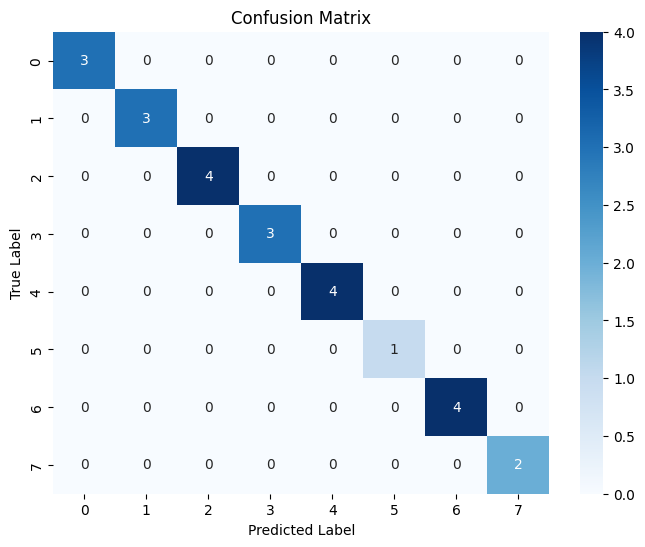

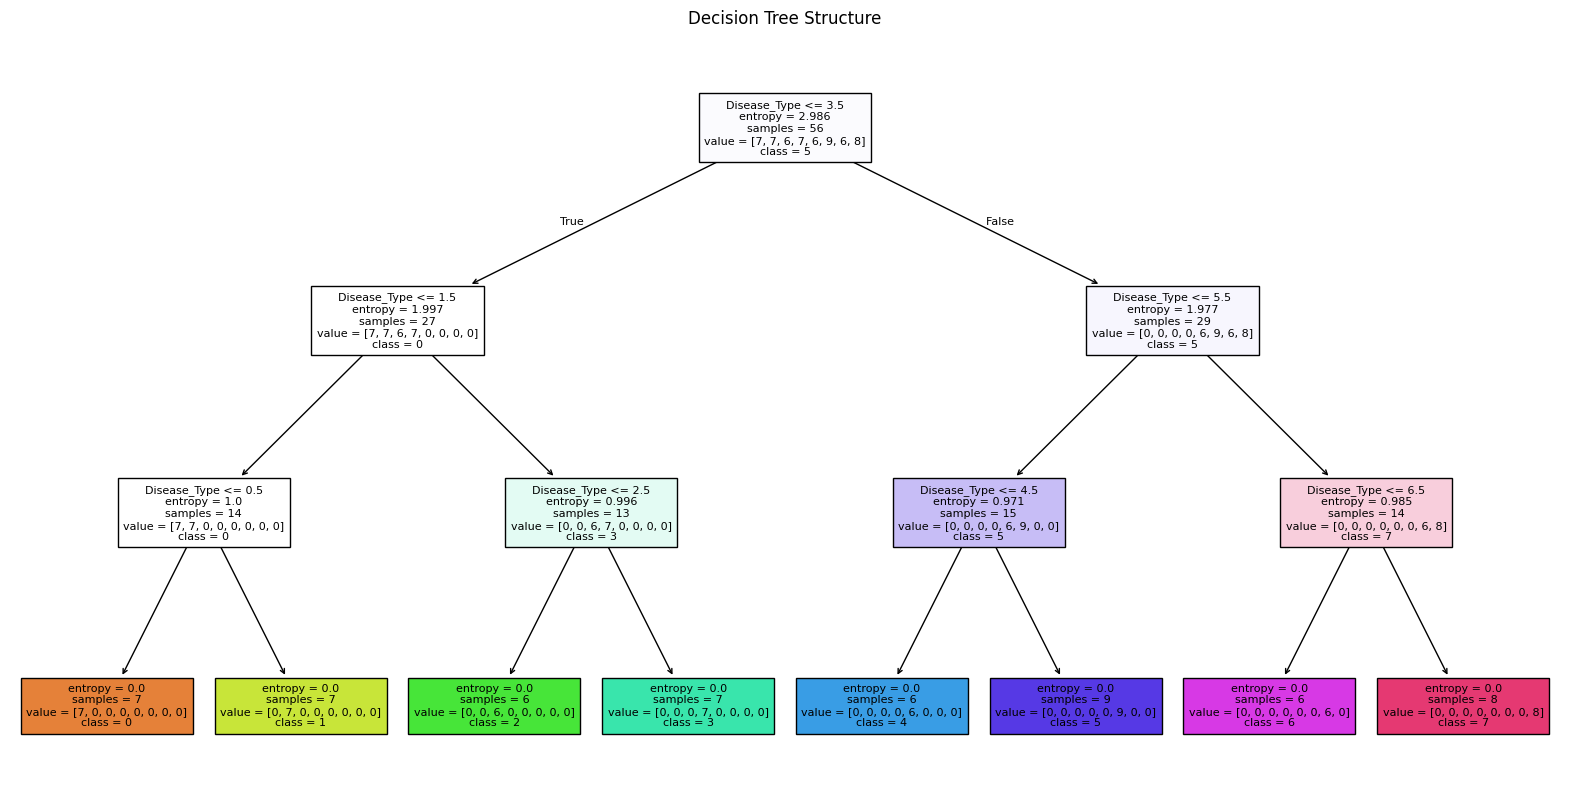

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ‡πÅ‡∏™‡∏î‡∏á Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(8), yticklabels=range(8))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ú‡∏ô‡∏ú‡∏±‡∏á‡∏Ç‡∏≠‡∏á Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=[str(i) for i in range(8)], fontsize=8)
plt.title("Decision Tree Structure")
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# ===============================
# ‡∏£‡∏±‡∏ö Input
# ===============================
print("\nüéØ ‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏Å‡∏£‡∏≠‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì üéØ")

age = int(input("üìå ‡∏≠‡∏≤‡∏¢‡∏∏‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì: "))

# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÄ‡∏û‡∏®
gender_map = {1: "‡∏ä‡∏≤‡∏¢", 2: "‡∏´‡∏ç‡∏¥‡∏á"}
gender_choice = int(input("üìå ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÄ‡∏û‡∏®‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì (1: ‡∏ä‡∏≤‡∏¢, 2: ‡∏´‡∏ç‡∏¥‡∏á): "))
gender = gender_map.get(gender_choice, "‡∏ä‡∏≤‡∏¢")

# ‡∏£‡∏±‡∏ö‡∏™‡πà‡∏ß‡∏ô‡∏™‡∏π‡∏á‡πÅ‡∏•‡∏∞‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å ‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì BMI
height = float(input("üìå ‡∏™‡πà‡∏ß‡∏ô‡∏™‡∏π‡∏á (cm): "))
weight = float(input("üìå ‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å (kg): "))
bmi = weight / ((height / 100) ** 2)

# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÇ‡∏£‡∏Ñ‡∏´‡∏•‡∏≤‡∏¢‡πÇ‡∏£‡∏Ñ‡πÑ‡∏î‡πâ
print("üìå ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÇ‡∏£‡∏Ñ‡∏õ‡∏£‡∏∞‡∏à‡∏≥‡∏ï‡∏±‡∏ß‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì (0. ‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÇ‡∏£‡∏Ñ, 1. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô, 2. ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á, 3. ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à, 4. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á, 5. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à, 6. ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à, 7. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à)")
print("   0. ‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÇ‡∏£‡∏Ñ")
print("   1. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô")
print("   2. ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á")
print("   3. ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à")
print("   4. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á")
print("   5. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à")
print("   6. ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à")
print("   7. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à")

disease_choices = input("‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏•‡∏Ç‡∏ó‡∏µ‡πà‡∏ï‡∏£‡∏á‡∏Å‡∏±‡∏ö‡πÇ‡∏£‡∏Ñ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì: ")

# ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç
# disease_list = [int(x) for x in disease_choices.split(",") if x.isdigit()]

# # ‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏•‡∏¢ ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÄ‡∏õ‡πá‡∏ô "‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÇ‡∏£‡∏Ñ"
# if len(disease_list) == 1 and disease_list[0] == 1:
#     disease_encoded = [0]  # ‡πÑ‡∏°‡πà‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÇ‡∏£‡∏Ñ
# else:
#     disease_encoded = [x - 1 for x in disease_list if x > 1]  # ‡∏•‡∏î‡∏Ñ‡πà‡∏≤‡∏•‡∏á 1 (‡πÉ‡∏´‡πâ‡∏™‡∏≠‡∏î‡∏Ñ‡∏•‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ö df)

# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°
activity_map = {1: "‡∏ô‡πâ‡∏≠‡∏¢", 2: "‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á", 3: "‡∏°‡∏≤‡∏Å"}
activity_choice = int(input("üìå ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì (1: ‡∏ô‡πâ‡∏≠‡∏¢, 2: ‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á, 3: ‡∏°‡∏≤‡∏Å): "))
activity = activity_map.get(activity_choice, "‡∏ô‡πâ‡∏≠‡∏¢")

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏û‡∏•‡∏±‡∏á‡∏á‡∏≤‡∏ô
bmr_base = 66 if gender == "‡∏ä‡∏≤‡∏¢" else 655
bmr_weight = 13.7 if gender == "‡∏ä‡∏≤‡∏¢" else 9.6
bmr_height = 5 if gender == "‡∏ä‡∏≤‡∏¢" else 1.8
bmr_age = 6.8 if gender == "‡∏ä‡∏≤‡∏¢" else 4.7

bmr = bmr_base + (bmr_weight * weight) + (bmr_height * height) - (bmr_age * age)
activity_multiplier = {"‡∏ô‡πâ‡∏≠‡∏¢": 1.375, "‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á": 1.55, "‡∏°‡∏≤‡∏Å": 1.7}
daily_calorie = bmr * activity_multiplier[activity]

# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ Gender, Activity_Level
gender_encoded = 1 if gender == "‡∏ä‡∏≤‡∏¢" else 2
activity_encoded = {"‡∏ô‡πâ‡∏≠‡∏¢": 1, "‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á": 2, "‡∏°‡∏≤‡∏Å": 3}[activity]

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏´‡∏°‡πà (‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤ Disease_Type ‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≤‡∏£‡∏ß‡∏°‡∏Ç‡∏≠‡∏á‡πÇ‡∏£‡∏Ñ)
new_user = pd.DataFrame({
    "Ages": [age],
    "Gender": [gender_encoded],
    "Height": [height],
    "Weight": [weight],
    "Bmi": [bmi],
    "Disease_Type": [disease_choices], 
    "Activity_Level": [activity_encoded]
})

# ===============================
# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢+‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡∏≠‡∏≤‡∏´‡∏≤‡∏£
# ===============================
predicted_menu_code = clf.predict(new_user)[0]

# ===============================
# Mapping ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡∏≠‡∏≤‡∏´‡∏≤‡∏£
# ===============================
food_mapping = {
    0: [0],       # ‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÇ‡∏£‡∏Ñ
    1: [1],       # ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô
    2: [2],       # ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á
    3: [3],       # ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à
    4: [1, 2],    # ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á
    5: [1, 3],    # ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à
    6: [2, 3],    # ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à
    7: [1, 2, 3]  # ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à
}


# ===============================
# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢+‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡∏≠‡∏≤‡∏´‡∏≤‡∏£
# ===============================
food_code_mapping = food_mapping.get(predicted_menu_code, []) 

food_types = []
for disease in food_code_mapping:
    food_types.extend(food_mapping.get(disease, []))

recommended_foods = df_food[df_food["Food_Type"].isin(food_types)]

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
print('========================================')
print('\n‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì')
print('========================================')
print("‡∏Ñ‡∏∏‡∏ì‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏û‡∏®:", gender)
print("‡∏Ñ‡∏∏‡∏ì‡∏≠‡∏≤‡∏¢‡∏∏:", age)
print("‡∏Ñ‡∏∏‡∏ì‡∏™‡∏π‡∏á:", height, "‡∏ã‡∏°.")
print("‡∏Ñ‡∏∏‡∏ì‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å:", weight, "‡∏Å‡∏Å.")
print(f"BMI ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì: {bmi:.2f}")
print("‡∏Ñ‡∏∏‡∏ì‡∏°‡∏µ‡πÇ‡∏£‡∏Ñ:", disease_choices)
print("‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Å‡∏¥‡∏à‡∏Å‡∏£‡∏£‡∏°‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì:", activity)
print(f"‡∏û‡∏•‡∏±‡∏á‡∏á‡∏≤‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡∏ì‡∏Ñ‡∏ß‡∏£‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö/‡∏ß‡∏±‡∏ô: {int(daily_calorie)} ‡∏Å‡∏¥‡πÇ‡∏•‡πÅ‡∏Ñ‡∏•‡∏≠‡∏£‡∏µ")

print('========================================')
print("\nüçΩ ‡πÄ‡∏°‡∏ô‡∏π‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ñ‡∏∏‡∏ì:", predicted_menu_code)
print("‚úÖ ‡πÄ‡∏°‡∏ô‡∏π‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥:")

if not recommended_foods.empty:
    for index, row in recommended_foods.iterrows():
        print(f"- {row['Food_Name']} (‡∏û‡∏•‡∏±‡∏á‡∏á‡∏≤‡∏ô {row['Energy (kcal)']} kcal, ‡πÇ‡∏õ‡∏£‡∏ï‡∏µ‡∏ô {row['Protein (g)']}g, ‡∏Ñ‡∏≤‡∏£‡πå‡πÇ‡∏ö‡πÑ‡∏Æ‡πÄ‡∏î‡∏£‡∏ï {row['Carbohydrates (g)']}g, ‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏• {row['Sugars (g)']}g, ‡πÑ‡∏Ç‡∏°‡∏±‡∏ô {row['Fat (g)']}g, ‡πÇ‡∏ã‡πÄ‡∏î‡∏µ‡∏¢‡∏° {row['Sodium (mg)']}mg)")
else:
    print("‚ùå ‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÄ‡∏°‡∏ô‡∏π‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏° ‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏ê‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•")





üéØ ‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏Å‡∏£‡∏≠‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì üéØ
üìå ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÇ‡∏£‡∏Ñ‡∏õ‡∏£‡∏∞‡∏à‡∏≥‡∏ï‡∏±‡∏ß‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì (0. ‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÇ‡∏£‡∏Ñ, 1. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô, 2. ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á, 3. ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à, 4. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á, 5. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à, 6. ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à, 7. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à)
   0. ‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÇ‡∏£‡∏Ñ
   1. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô
   2. ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á
   3. ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à
   4. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏î‡∏±‡∏ô‡πÇ‡∏•‡∏´‡∏¥‡∏ï‡∏™‡∏π‡∏á
   5. ‡πÇ‡∏£‡∏Ñ‡πÄ‡∏ö‡∏≤‡∏´‡∏ß‡∏≤‡∏ô + ‡πÇ‡∏£‡∏Ñ‡∏´‡∏±‡∏ß‡πÉ‡∏à
   6.

In [43]:
import joblib

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
# joblib.dump(clf, 'food_recommendation_model.pkl')
# print("\nüéâ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! (food_recommendation_model.pkl)")